In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
classifier = 'RF' #RF DNN
balance = 'balance=0.5'

dataset = 'Kaggle' #Kaggle  Generator SkLearn
sklearn_datasets = ['n_features=16_n_clusters=1_class_sep=8_balance=0.5',
                    'n_features=64_n_clusters=16_class_sep=8_balance=0.5', 'n_features=64_n_clusters=16_class_sep=1_balance=0.5']

SKLEAN_COUNTER = 0

if dataset == 'SkLearn':
    dir = os.path.join('averaged_results', classifier, dataset)
else:
    dir = os.path.join('averaged_results_local', classifier, dataset, balance)

os.path.exists(dir), os.path.exists(os.path.join(dir, sklearn_datasets[SKLEAN_COUNTER]))


(False, False)

In [201]:


if dataset == 'Generator':
    k_types = ['k-0', 'k-Term', 'k-Cust', 'k-Cust_Term']
    u_types = ['u-0', 'u-Term', 'u-Cust', 'u-Cust_Term']
elif dataset == 'Kaggle':
    k_types = ['k-0', 'k-3', 'k-6', 'k-9', 'k-12', 'k-15', 'k-18']
    u_types = ['u-0', 'u-3', 'u-6', 'u-9', 'u-12', 'u-15', 'u-18']
elif dataset == 'SkLearn' and SKLEAN_COUNTER ==0:
    k_types = ['k-0', 'k-2', 'k-4', 'k-6', 'k-8', 'k-10', 'k-12']
    u_types = ['u-0', 'u-2', 'u-4', 'u-6', 'u-8', 'u-10', 'u-12']
elif dataset == 'SkLearn' and SKLEAN_COUNTER != 0:
    k_types = ['k-0', 'k-8', 'k-16', 'k-24', 'k-32', 'k-40', 'k-48']
    u_types = ['u-0', 'u-8', 'u-26', 'u-24', 'u-32', 'u-40', 'u-48']



df_dict = {}

for k_type in k_types:
    df_dict[k_type] = {}
    for u_type in u_types:
        try:
            if dataset == 'SkLearn':
                df_dict[k_type][u_type] = pd.read_csv(os.path.join(dir, sklearn_datasets[SKLEAN_COUNTER], k_type, u_type,  'mean.csv')) #32_mean #16_mean
            else:   
                df_dict[k_type][u_type] = pd.read_csv(os.path.join(dir, k_type, u_type,  'mean.csv')) #32_mean #16_mean            
        except:
            pass

"""
file1 = os.path.join(dir, 'k-0', 'u-0', 'reward-label', 'file.csv')
file2 = os.path.join(dir, 'k-0', 'u-Term', 'reward-label', 'file.csv')
file3 = os.path.join(dir, 'k-Term', 'u-Cust', 'reward-label', 'file.csv')
file4 = os.path.join(dir, 'k-0', 'u-Cust_Term', 'reward-label', 'file.csv')

df1 = pd.read_csv(file1) #.iloc[:3000, :]
df2 = pd.read_csv(file2) #.iloc[:3000, :]
df3 = pd.read_csv(file3) #.iloc[:3000, :]
df4 = pd.read_csv(file4) #.iloc[:3000, :]
"""

"\nfile1 = os.path.join(dir, 'k-0', 'u-0', 'reward-label', 'file.csv')\nfile2 = os.path.join(dir, 'k-0', 'u-Term', 'reward-label', 'file.csv')\nfile3 = os.path.join(dir, 'k-Term', 'u-Cust', 'reward-label', 'file.csv')\nfile4 = os.path.join(dir, 'k-0', 'u-Cust_Term', 'reward-label', 'file.csv')\n\ndf1 = pd.read_csv(file1) #.iloc[:3000, :]\ndf2 = pd.read_csv(file2) #.iloc[:3000, :]\ndf3 = pd.read_csv(file3) #.iloc[:3000, :]\ndf4 = pd.read_csv(file4) #.iloc[:3000, :]\n"

In [202]:
def flatten_dict(d):
    flat = {}
    for k1, v1 in d.items():
        for k2, v2 in v1.items():
            flat[k1 + '-' + k2] = v2
    return flat

df_dict_flat = flatten_dict(df_dict)
df_dict_flat.keys()

dict_keys(['k-0-u-8', 'k-0-u-10', 'k-0-u-12', 'k-2-u-6', 'k-2-u-8', 'k-2-u-10', 'k-2-u-12', 'k-4-u-4', 'k-4-u-6', 'k-4-u-8', 'k-4-u-10', 'k-6-u-2', 'k-6-u-4', 'k-6-u-6', 'k-6-u-8', 'k-8-u-0', 'k-8-u-2', 'k-8-u-4', 'k-8-u-6', 'k-10-u-0', 'k-10-u-2', 'k-10-u-4', 'k-12-u-0', 'k-12-u-2'])

In [203]:
#df_dict_flat['k-0-u-0']

In [204]:
times = [300,  500,  1000, 4000]
array1 = np.zeros([len(df_dict_flat.keys()), len(times)])
array2 = np.zeros([len(df_dict_flat.keys()), len(times)])

df_max = pd.DataFrame((array1), index=df_dict_flat.keys(), columns=times)
df_ppo = pd.DataFrame((array2), index=df_dict_flat.keys(), columns=times)
df_ppo.head()

,300,500,1000,4000
k-0-u-8,0.0,0.0,0.0,0.0
k-0-u-10,0.0,0.0,0.0,0.0
k-0-u-12,0.0,0.0,0.0,0.0
k-2-u-6,0.0,0.0,0.0,0.0
k-2-u-8,0.0,0.0,0.0,0.0


In [205]:
for key in df_dict_flat.keys():
    for time in times:
        df_ppo.loc[key, time] = df_dict_flat[key]['PPO'].iloc[:time].mean()
        if key == 'k-0-u-Term':
            print(df_without_ppo.iloc[:time, :].mean())
            print(max(df_without_ppo.iloc[:time, :].mean()))
            print(df_ppo.loc[key, time])

        df_without_ppo = df_dict_flat[key].drop('PPO', axis=1)
        df_max.loc[key, time] = max(df_without_ppo.iloc[:time, :].mean())
        

In [206]:
baselines_df = pd.DataFrame()
for key in df_dict_flat.keys(): 
    df = df_dict_flat[key].drop('PPO', axis=1)
    baselines_df.loc[:, key] = df.mean()
baselines_to_save = baselines_df.T.round(2)

baselines_latex = baselines_to_save.to_latex()

with open(f'Baselines{dataset}{classifier}.tex', 'w') as file:
    file.write(baselines_latex)

In [207]:
df_ppo

,300,500,1000,4000
k-0-u-8,0.003750,0.004375,0.003375,0.003875
k-0-u-10,0.373958,0.589125,0.768000,0.907078
k-0-u-12,0.003333,0.004000,0.003000,0.003531
k-2-u-6,0.021667,0.024375,0.026250,0.086563
k-2-u-8,0.056667,0.090500,0.207875,0.372156
k-2-u-10,0.003333,0.004000,0.003000,0.003500
k-2-u-12,0.003333,0.004000,0.003000,0.003500
k-4-u-4,0.529167,0.694375,0.823438,0.912172
k-4-u-6,0.468958,0.662625,0.814312,0.926547
k-4-u-8,0.003333,0.004000,0.003000,0.003547


In [208]:
df_max

,300,500,1000,4000
k-0-u-8,0.017292,0.014750,0.012250,0.010656
k-0-u-10,0.475833,0.477000,0.475250,0.478391
k-0-u-12,0.005625,0.004875,0.004562,0.003922
k-2-u-6,0.875000,0.869500,0.858812,0.842313
k-2-u-8,0.076250,0.073750,0.072750,0.073891
k-2-u-10,0.005417,0.004500,0.004313,0.003953
k-2-u-12,0.005000,0.005125,0.004188,0.003984
k-4-u-4,1.000000,1.000000,1.000000,1.000000
k-4-u-6,1.000000,1.000000,1.000000,0.999969
k-4-u-8,0.005417,0.004500,0.004313,0.003953


In [209]:
df_ppo - df_max

,300,500,1000,4000
k-0-u-8,-0.013542,-0.010375,-0.008875,-0.006781
k-0-u-10,-0.101875,0.112125,0.292750,0.428687
k-0-u-12,-0.002292,-0.000875,-0.001562,-0.000391
k-2-u-6,-0.853333,-0.845125,-0.832562,-0.755750
k-2-u-8,-0.019583,0.016750,0.135125,0.298266
k-2-u-10,-0.002083,-0.000500,-0.001313,-0.000453
k-2-u-12,-0.001667,-0.001125,-0.001188,-0.000484
k-4-u-4,-0.470833,-0.305625,-0.176562,-0.087828
k-4-u-6,-0.531042,-0.337375,-0.185688,-0.073422
k-4-u-8,-0.002083,-0.000500,-0.001313,-0.000406


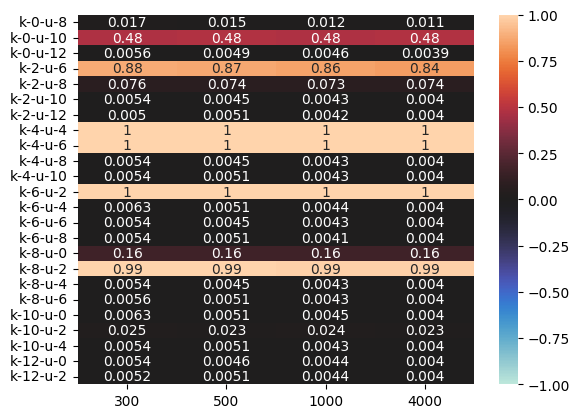

In [210]:
sns.heatmap(df_max, annot=True, vmin=-1, vmax=1, cmap='icefire')
plt.show()

In [211]:
df_ppo['Best Baseline'] = df_max.mean(axis=1)
df_ppo.head()


,300,500,1000,4000,Best Baseline
k-0-u-8,0.003750,0.004375,0.003375,0.003875,0.013737
k-0-u-10,0.373958,0.589125,0.768000,0.907078,0.476618
k-0-u-12,0.003333,0.004000,0.003000,0.003531,0.004746
k-2-u-6,0.021667,0.024375,0.026250,0.086563,0.861406
k-2-u-8,0.056667,0.090500,0.207875,0.372156,0.074160


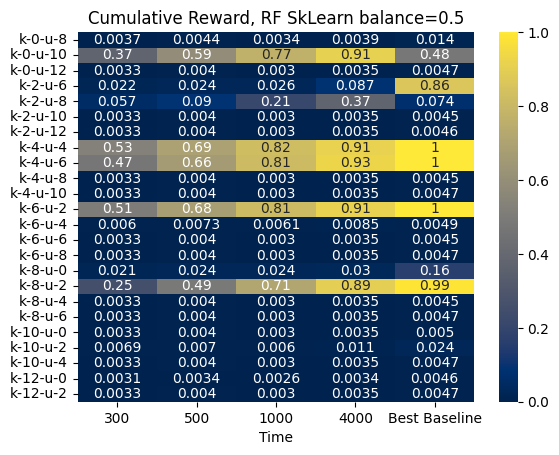

In [212]:
sns.heatmap(df_ppo, annot=True, vmin=0, vmax=1, cmap='cividis')
plt.title(f'Cumulative Reward, {classifier} {dataset} {balance}')
plt.xlabel('Time')
plt.show()

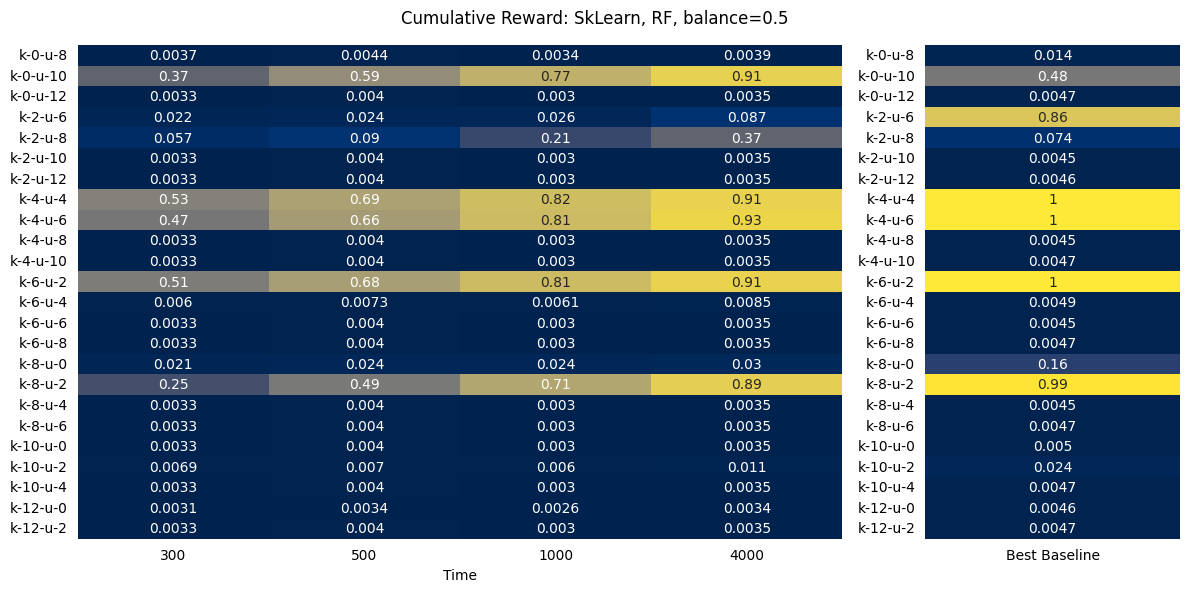

In [214]:
# Separate "Baseline" from other columns
baseline = df_ppo[['Best Baseline']]
other_metrics = df_ppo.drop(columns=['Best Baseline'])
# Create a figure for the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 1]})

# Heatmap for other metrics (left side)
sns.heatmap(other_metrics, annot=True, cmap='cividis',  vmin=0, vmax=1,ax=axes[0], cbar=False)
#axes[0].set_title('Other Metrics')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('')
axes[0].tick_params(left=False, bottom=False)

# Heatmap for Baseline (right side)
sns.heatmap(baseline, annot=True, cmap='cividis',  vmin=0, vmax=1,cbar=False, ax=axes[1])
#axes[1].set_title('Baseline')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(left=False, bottom=False)

title = f'Cumulative Reward: {dataset}, {classifier}, {balance}'
plt.suptitle(title)
# Adjust layout
plt.tight_layout()

plt.savefig(f'Cumulative_Reward_{dataset}_{classifier}_{balance}.png')

plt.show()


In [169]:
f'{title}.png'

'Cumulative Reward: SkLearn, DNN, balance=0.5.png'

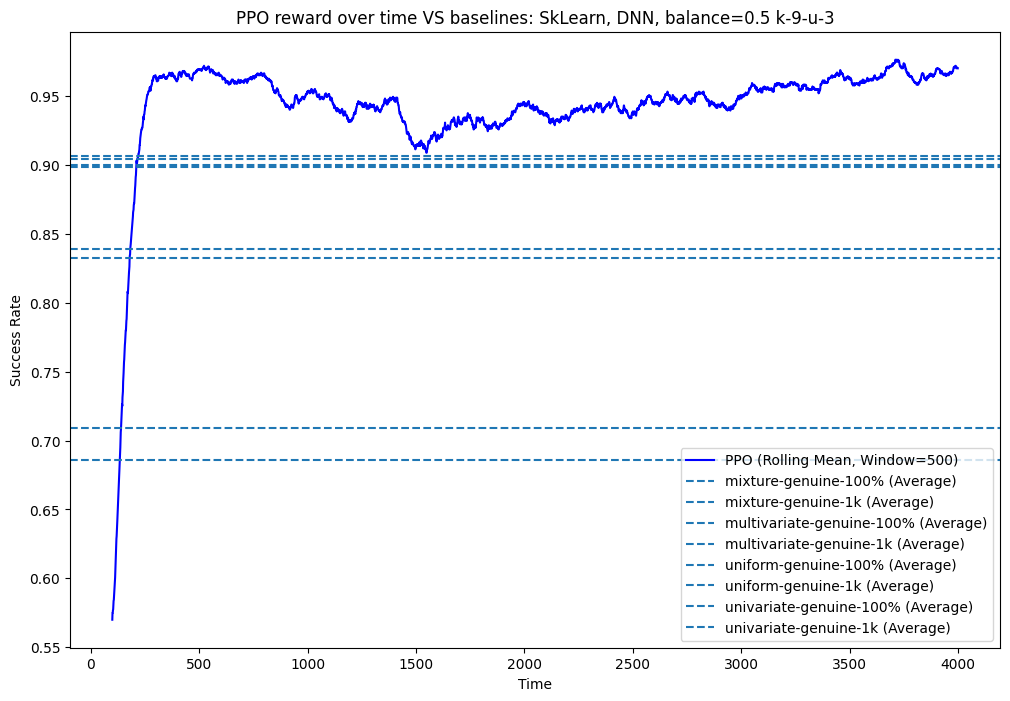

In [185]:
# Calculate rolling mean for 'PPO'

df =  df_dict_flat['k-6-u-2'] #' k-9-u-3' k-0-u-0

ppo_rolling_mean = df['PPO'].rolling(window=100).mean()


# Calculate flat averages for all columns except 'PPO'
other_columns = df.columns.difference(['PPO'])
flat_means = df[other_columns].mean()

# Plot
plt.figure(figsize=(12, 8))
plt.plot(ppo_rolling_mean, label='PPO (Rolling Mean, Window=500)', color='blue')

# Add flat average lines for each of the other columns
for col in other_columns:
    plt.axhline(y=flat_means[col], label=f'{col} (Average)', linestyle='--')


plt.xlabel('Time')
plt.ylabel('Success Rate')
title = f'PPO reward over time VS baselines: {dataset}, {classifier}, {balance} k-9-u-3'

plt.title(title)
plt.legend()
plt.savefig(f'PPO_reward_{dataset}_{classifier}_{balance}.png')

plt.show()
#plt.plot(df_dict_flat['k-32-u-0'].rolling(window=100).mean())
